In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
from pandas.api.types import CategoricalDtype
import glob

sns.set_theme(style="ticks", color_codes=True)
sns.set(style="ticks")

def LoadData(base_dir):
    dfs = []
    search_string="*slam_eval.csv"
    print("opening the following files:")
    for filename in glob.glob(base_dir+search_string, recursive=True):
        print(filename)
        df = pd.read_csv(filename, index_col=None, header=0, skipinitialspace=True)
        dfs.append(df)
    
    search_string="*odometry_eval.csv"
    for filename in glob.glob(base_dir+search_string, recursive=True):
        print(filename)
        df = pd.read_csv(filename, index_col=None, header=0, skipinitialspace=True)
        dfs.append(df)
    return pd.concat(dfs, axis=0, ignore_index=True)
    
###### LOAD DATA ############
baseline='./data/traj_and_results/'
df=LoadData(baseline)

df = df.rename(columns={'resolution r': 'resolution r [m]'})
df['for_copy'] = df.apply (lambda row: "{:2.2f}".format(row["Trans.err.(%)"])+"/"+"{:2.2f}".format(row["Rot.err.(deg/100m)"]) , axis=1)
df['for_copy_ATE'] = df.apply (lambda row: "{:2.2f}".format(100*row["RPE(m)"])+"/"+"{:2.2f}".format(row["ATE(m)"]) , axis=1)
df['for_copy_RMSE'] = df.apply (lambda row: "{:2.2f}".format(100*row["RMSE (m)"]) , axis=1)
rpe_rmse_mean = "{:2.2f}".format(100*df["RMSE (m)"].mean())

opening the following files:
./data/traj_and_results/mulran_eval_2022-09-21_14-35_slam_eval.csv
./data/traj_and_results/mulran_eval_2022-09-21_14-35_odometry_eval.csv


In [ ]:
## USE EITHER ## 
## MULRAN     ##
df=df[df["dataset"]=="Mulran"]
cat_size_order = CategoricalDtype(
    ['KAIST01','KAIST02','KAIST03','DCC01','DCC02','DCC03','Riverside01','Riverside02','Riverside03'], 
    ordered=True
)
df['sequence'] = df["sequence"].astype(cat_size_order)
df=df.sort_values('sequence')
##############################

In [ ]:
####  OR     ####
####  OXFORD ####
df=df[df["dataset"]=="oxford"]
df['sequence'] = df.apply (lambda row: str(row["sequence"])[8:-20], axis=1)
cat_size_order = CategoricalDtype(
    ["10-12-32", "16-13-09", "17-13-26", "18-14-14", "18-15-20", "10-11-46", "16-11-53","18-14-46"], 
    ordered=True
)
df['sequence'] = df["sequence"].astype(cat_size_order)
df=df.sort_values(['sequence','method'])
##############################
  

In [ ]:
with open(baseline + "eval_pars.csv", 'r') as f:
    lines = f.readlines()
f.close()

parameters = {}
for line in lines:
    if len(line) <= 1:
        continue
    line = line.rstrip('\n').split(',')
    if len(line[1:]) > 1:
        parameters[line[0]] = line[1:]
print(parameters)

for par in parameters:

    g = sns.catplot(x=par, y="Trans.err.(%)",
                    data=df, saturation=.5,
                    kind="bar", ci=None, aspect=1)
    g.set_xticklabels(rotation=90)

    g = sns.catplot(x=par, y="Rot.err.(deg/100m)",
                    data=df, saturation=.5,
                    kind="bar", ci=None, aspect=1)
    g.set_xticklabels(rotation=90)

    g = sns.catplot(x=par, y="RPE(m)",
                    data=df, saturation=.5,
                    kind="bar", ci=None, aspect=1)
    g.set_xticklabels(rotation=90)


    g = sns.catplot(x=par, y="RMSE (m)",
                    data=df, saturation=.5,
                    kind="bar", ci=None, aspect=1)
    g.set_xticklabels(rotation=90)

Methods
['TBV SLAM-1' 'cfear-x']

-----------------------------------------------
Odometry drift [translaton/rotaiton]
Average time per frame [ms]
-----------------------------------------------
Sequences:           DCC01 &  Riverside01 &  KAIST01
Odometry error transl[m/m]/rot[deg/100m]
TBV SLAM-1:   3.11/0.88 & 2.51/0.68 & 1.63/0.49 & mean: 2.42/0.68
registration time [ms]
TBV SLAM-1:   nanms, filtering: nanms, total: nanms, framerate: nanHz

Odometry error transl[m/m]/rot[deg/100m]
cfear-x:   2.07/0.29 & 1.22/0.34 & 1.07/0.32 & mean: 1.45/0.32
registration time [ms]
cfear-x:   100283657632.03ms, filtering: 7.78ms, total: 100283657639.8ms, framerate: 0.0Hz


-----------------------------------------------

RPE (Mean) and ATE (RMSE) (Aligned) 

-----------------------------------------------

RPE Mean [cm]/ATE-RMSE [m]: 
TBV SLAM-1:   7.94/10.17 & 6.20/5.79 & 6.19/3.41 & mean: 6.78/6.46
RPE-RMSE [cm]: 
TBV SLAM-1:   8.99 & 7.33 & 8.13 & mean: 8.15


RPE Mean [cm]/ATE-RMSE [m]: 
cfear-

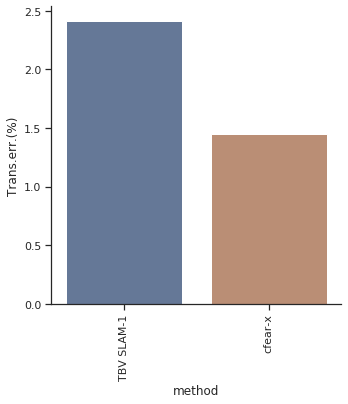

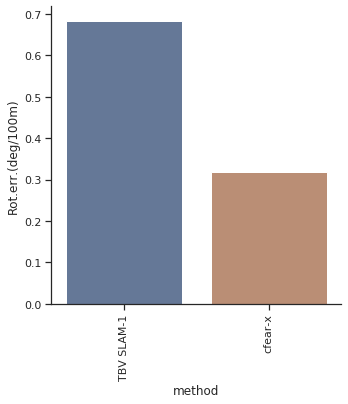

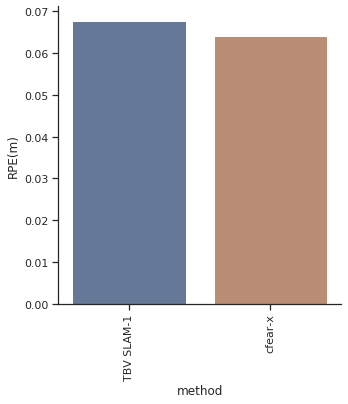

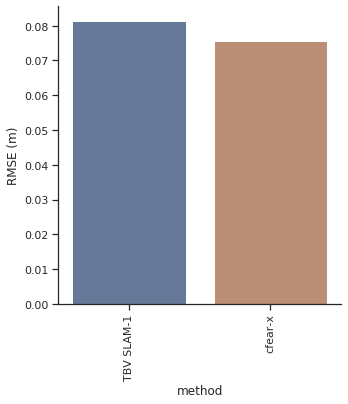

In [8]:
df['method'] = df['method'].fillna("TBV SLAM-1")
g = sns.catplot(x="method", y="Trans.err.(%)",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1)
g.set_xticklabels(rotation=90)

g = sns.catplot(x="method", y="Rot.err.(deg/100m)",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1)
g.set_xticklabels(rotation=90)

g = sns.catplot(x="method", y="RPE(m)",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1)
g.set_xticklabels(rotation=90)


g = sns.catplot(x="method", y="RMSE (m)",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1)
g.set_xticklabels(rotation=90)

methods=df['method'].unique()
print("Methods")
print(methods)
print("\n-----------------------------------------------")
print("Odometry drift [translaton/rotaiton]")
print("Average time per frame [ms]")
print("-----------------------------------------------")
for method in [methods[0]]:
    dfm=df[df["method"]==method]
    print("Sequences:           "+" &  ".join(dfm["sequence"].values) )
for method in methods:
    dfm=df[df["method"]==method]
    if(dfm.shape[0]>0):
        trans_mean = "{:2.2f}".format(dfm["Trans.err.(%)"].mean())
        rot_mean = "{:2.2f}".format(dfm["Rot.err.(deg/100m)"].mean())
        reg_time = "{:2.2f}ms".format(dfm["Registration avg"].mean())
        filtering_time = "{:2.2f}ms".format(dfm["Filtering avg"].mean())
        total = "{:2.1f}ms".format(dfm["Filtering avg"].mean() + dfm["Registration avg"].mean())
        framerate = "{:2.1f}Hz".format(1000.0/(dfm["Filtering avg"].mean() + dfm["Registration avg"].mean()))
        print("Odometry error transl[m/m]/rot[deg/100m]")
        print(method + ":   "+" & ".join(dfm["for_copy"].values) + " & mean: " + trans_mean + "/" + rot_mean)
        print("registration time [ms]")
        print(method + ":   " + reg_time + ", filtering: " + filtering_time + ", total: " + total + ", framerate: " + framerate)
        print("")
print("\n-----------------------------------------------\n")
print("RPE (Mean) and ATE (RMSE) (Aligned) \n")
print("-----------------------------------------------\n")
for method in methods:
    dfm=df[df["method"]==method]
    if(dfm.shape[0]>0):
        ate_mean = "{:2.2f}".format(dfm["ATE(m)"].mean())
        rpe_mean = "{:2.2f}".format(100*dfm["RPE(m)"].mean())
        rpe_rmse_mean = "{:2.2f}".format(100*dfm["RMSE (m)"].mean())
        print("RPE Mean [cm]/ATE-RMSE [m]: ")
        print(method+":   "+" & ".join(dfm["for_copy_ATE"].values) + " & mean: " + rpe_mean + "/" + ate_mean)
        print("RPE-RMSE [cm]: ")
        print(method+":   "+" & ".join(dfm["for_copy_RMSE"].values) + " & mean: " + rpe_rmse_mean)
        print("\n")
        
        
        